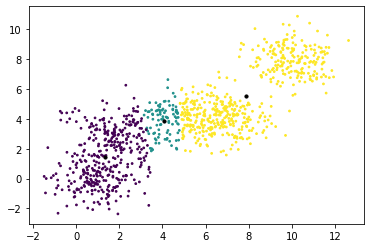

[[1.3540504  1.43808816]
 [4.05683949 3.87611076]
 [7.85327084 5.53470684]]


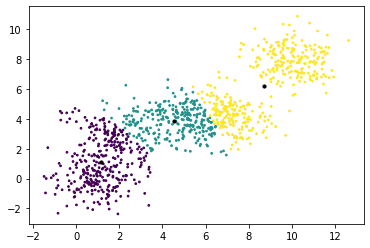

[[1.16926782 1.0860286 ]
 [4.54009415 3.83100678]
 [8.71149425 6.17979378]]


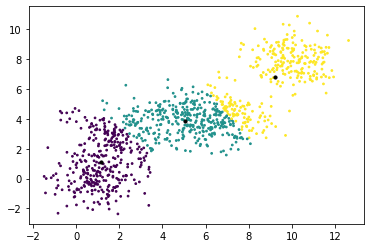

[[1.16926782 1.0860286 ]
 [5.02927751 3.8424283 ]
 [9.21652612 6.78843101]]


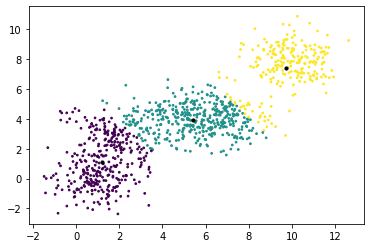

[[1.19390174 1.12938559]
 [5.41487089 3.94035481]
 [9.72566183 7.42118222]]


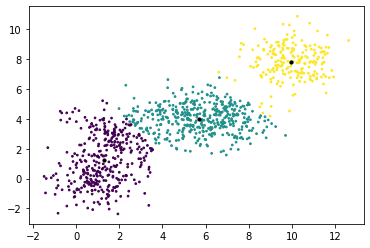

[[1.27303492 1.23790438]
 [5.70852262 4.00978166]
 [9.94638863 7.8156982 ]]


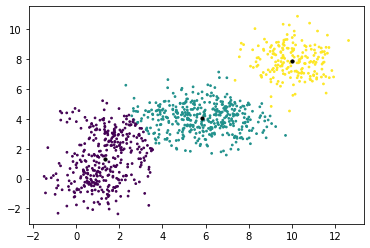

[[ 1.32341171  1.33366513]
 [ 5.84387313  4.03586733]
 [10.00275225  7.88834249]]


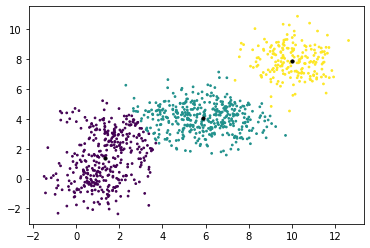

[[ 1.3497911   1.36775859]
 [ 5.88475045  4.04351604]
 [10.00275225  7.88834249]]


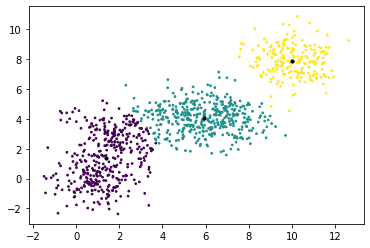

[[ 1.36476748  1.38238223]
 [ 5.90720747  4.05540107]
 [10.01593882  7.89489103]]


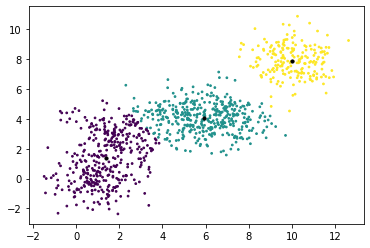

[[ 1.38310574  1.39128986]
 [ 5.92301348  4.06647606]
 [10.01593882  7.89489103]]


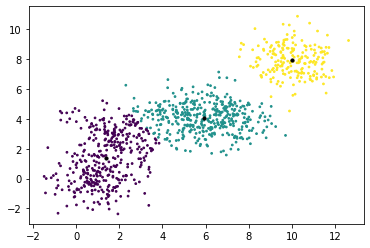

[[ 1.38310574  1.39128986]
 [ 5.93056165  4.06832792]
 [10.02084096  7.910286  ]]


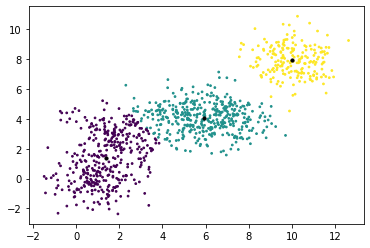

[[ 1.38310574  1.39128986]
 [ 5.93056165  4.06832792]
 [10.02084096  7.910286  ]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

def create_data():
    X,y = datasets.make_blobs(n_samples=1000,n_features=2,centers=[[1,0],[5,4],[2,3],[10,8],[7,4]])
    return X,y

def init_centers(data,k):
    m, n =data.shape
    center_ids = np.random.choice(m,k)
    centers = data[center_ids]
    return centers

def cal_dist(ptA,ptB):
   return np.linalg.norm(ptA-ptB)

def kmeans_process(data,k):
    centers = init_centers(data, k)
    m, n = data.shape
    keep_changing = True
    pred_y = np.zeros((m,))

    while keep_changing:
        keep_changing = False
        for i in range(m):
            min_distance = np.inf
            for center in range(k):
                distance = cal_dist(data[i,:],centers[center,:])
                if distance<min_distance: 
                    min_distance = distance
                    idx = center 
            if pred_y[i] != idx:  
                keep_changing = True
            pred_y[i] = idx
        
        for center in range(k):
            cluster_data = data[pred_y==center]
            centers[center,:] = np.mean(cluster_data, axis=0) 
        plt.scatter(X[:,0], X[:,1], s=3, c=pred_y)
        plt.scatter(centers[:,0], centers[:,1], s=10, c='k')
        plt.show()
        print(centers)
    return centers, pred_y

if __name__ == '__main__':
    X, y = create_data()
    centers , pred_y = kmeans_process(data=X, k=3)
    